В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN


In [2]:
df = pd.read_csv('glass.csv')
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# процент пропусков по столбцам - нет пропусков
df.isna().mean()*100

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [5]:
# кол-во целевых признаков 6
len(df['Type'].unique())

6

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [6]:
X = df.drop('Type', axis= 1)
y = pd.Series(df['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(max_depth = 5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [8]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7674418604651163

Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
b) Исследуйте признаки на выбросы несколькими способами.
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

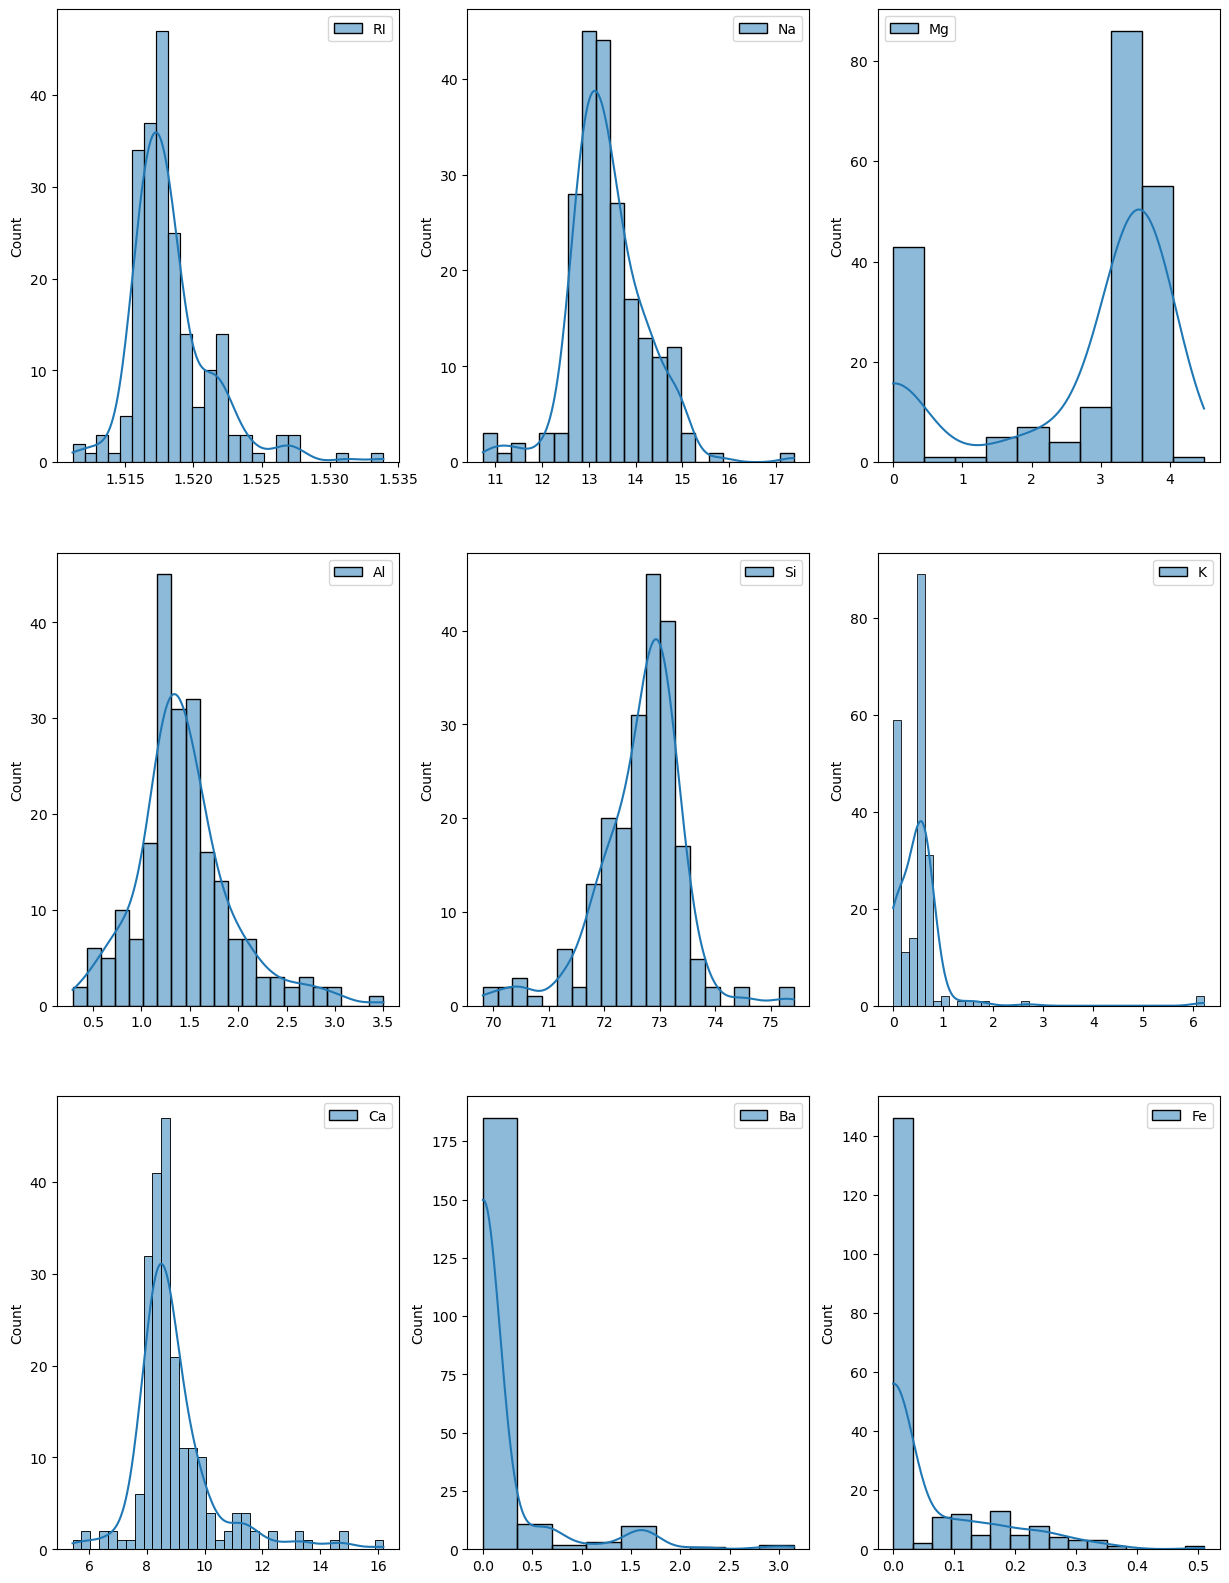

In [10]:

# Create the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))


for r in range(3):
    for c in range(3):
        sns.histplot(X.iloc[:, [3*r + c]], kde=True, ax=axes[r, c])

# Нормальное распределение - 'RI', 'Na', 'Al', 'Si', 'Ca'
    

In [58]:
# изолирующий лес
df_ = df.copy()
cols =['RI', 'Na', 'Al', 'Si', 'Ca']

model_IF = IsolationForest(random_state=67)

model_IF.fit(df_[cols])


IsolationForest(random_state=67)

In [59]:
df_['anomaly_scores'] = model_IF.decision_function(df_[cols])
df_['anomaly'] = model_IF.predict(df_[cols])

In [60]:
len(df_.loc[df_['anomaly'] < 0])
# 26 строк на удаление по всем классам, это 12%

26

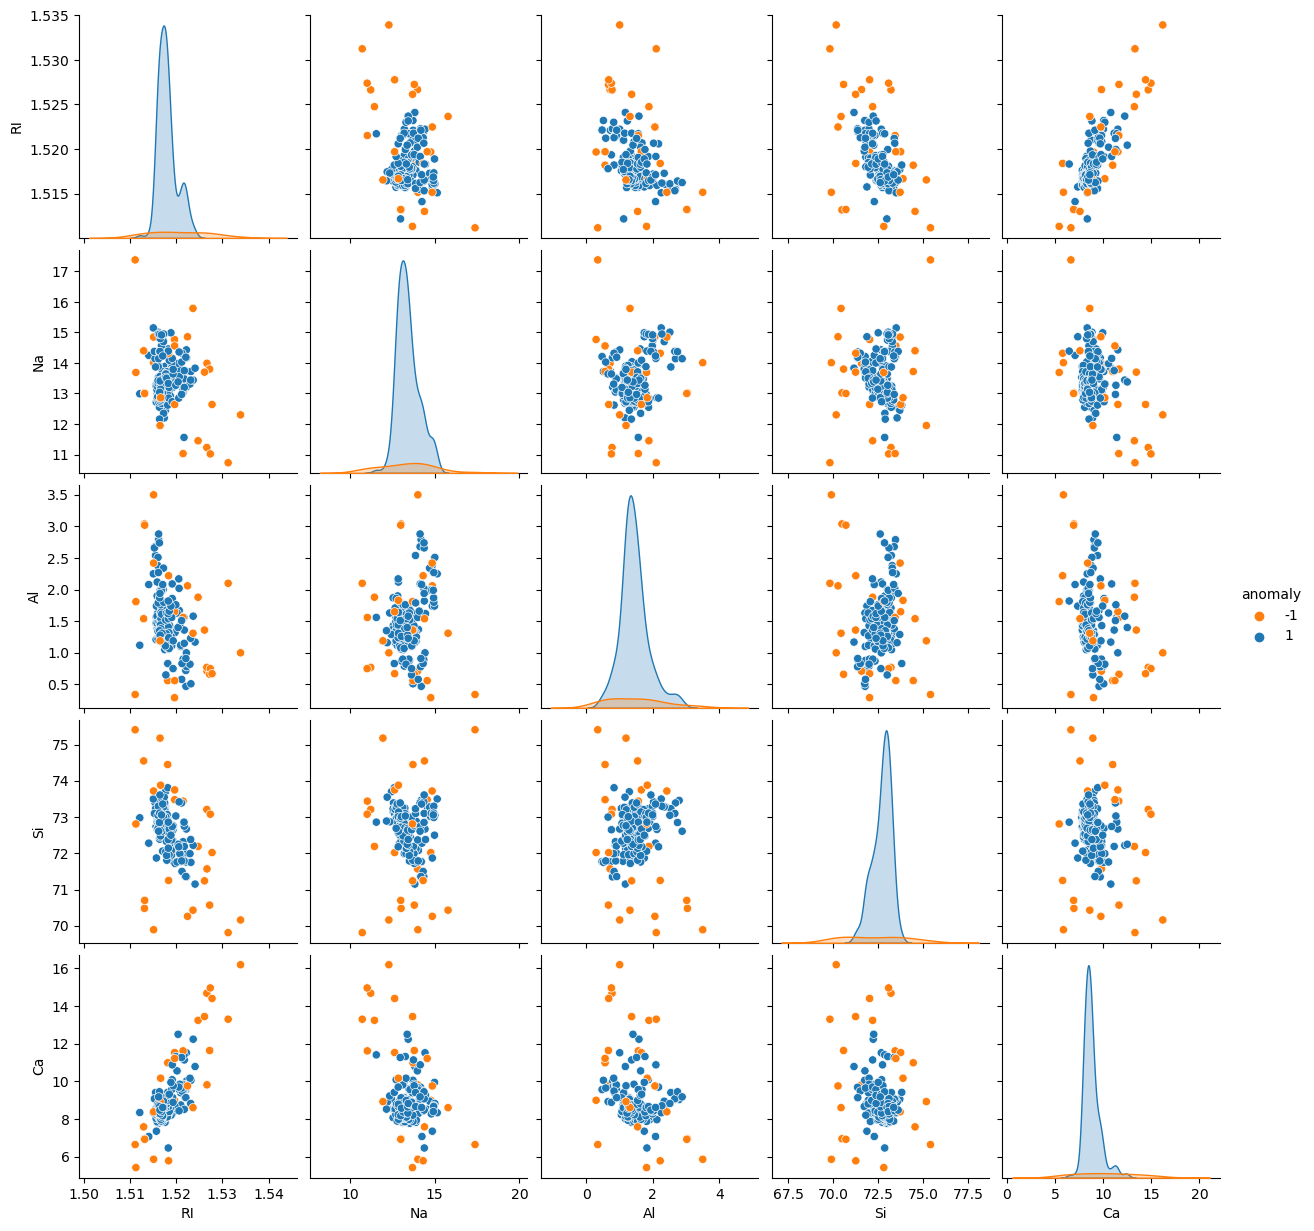

In [46]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_, vars=cols, hue='anomaly', palette=palette)

In [61]:
# удаляем
df_ = df_.loc[df_['anomaly'] > 0]


In [62]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 213
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RI              188 non-null    float64
 1   Na              188 non-null    float64
 2   Mg              188 non-null    float64
 3   Al              188 non-null    float64
 4   Si              188 non-null    float64
 5   K               188 non-null    float64
 6   Ca              188 non-null    float64
 7   Ba              188 non-null    float64
 8   Fe              188 non-null    float64
 9   Type            188 non-null    int64  
 10  anomaly_scores  188 non-null    float64
 11  anomaly         188 non-null    int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 18.4 KB


In [63]:
X = df_.drop(['Type', 'anomaly_scores', 'anomaly'], axis= 1)
y = pd.Series(df_['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.868421052631579

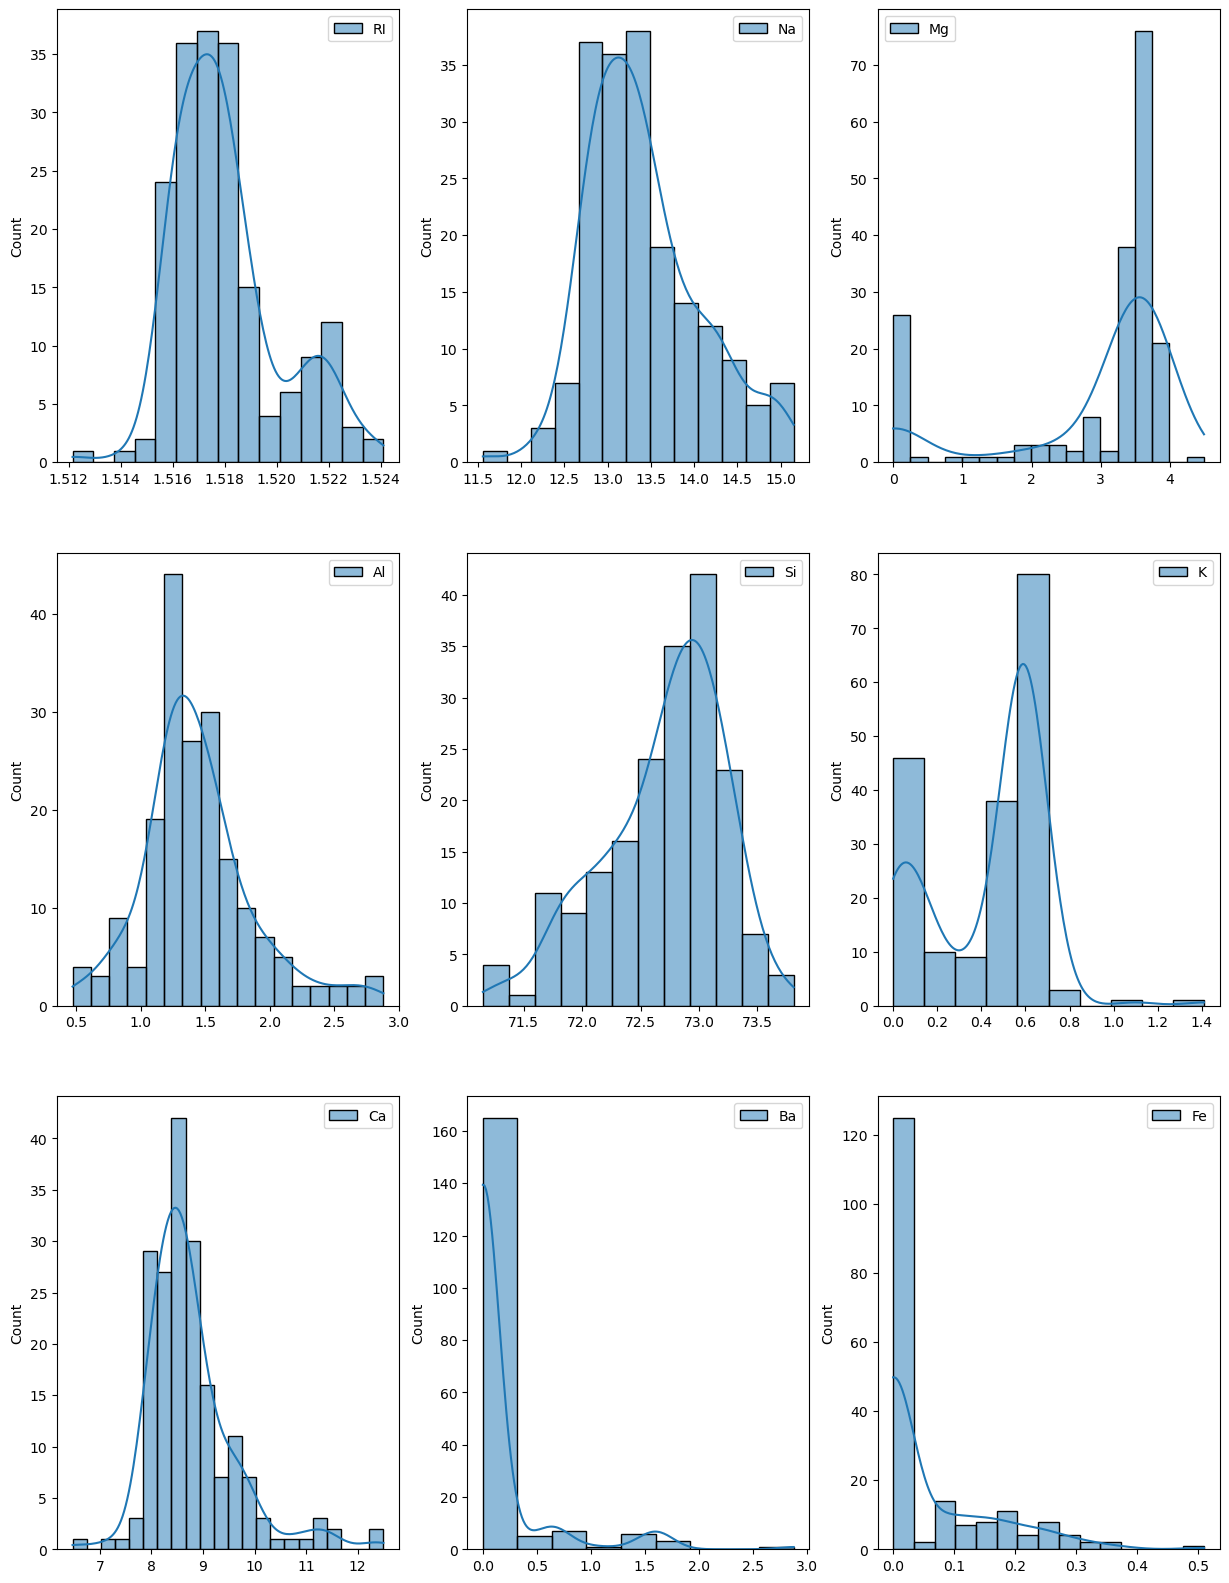

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))

for r in range(3):
    for c in range(3):
        sns.histplot(X.iloc[:, [3*r + c]], kde=True, ax=axes[r, c])

# смотрим как изменилось распределение        

In [234]:
# пробуем DBSCAN
df__ = df.copy()

dbscan = DBSCAN(eps=0.7, min_samples=2)
dbscan.fit(df__ [cols])

DBSCAN(eps=0.7, min_samples=2)

In [235]:
df__['anomaly'] = dbscan.labels_
len(df__.loc[df__['anomaly'] < 0])
# 31 строка на удаление - 14%

31

In [236]:
df__ = df__.loc[df__['anomaly'] > -1]

X = df__.drop(['Type', 'anomaly'], axis= 1)
y = pd.Series(df__['Type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
model = RandomForestClassifier(max_depth = 5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8648648648648649

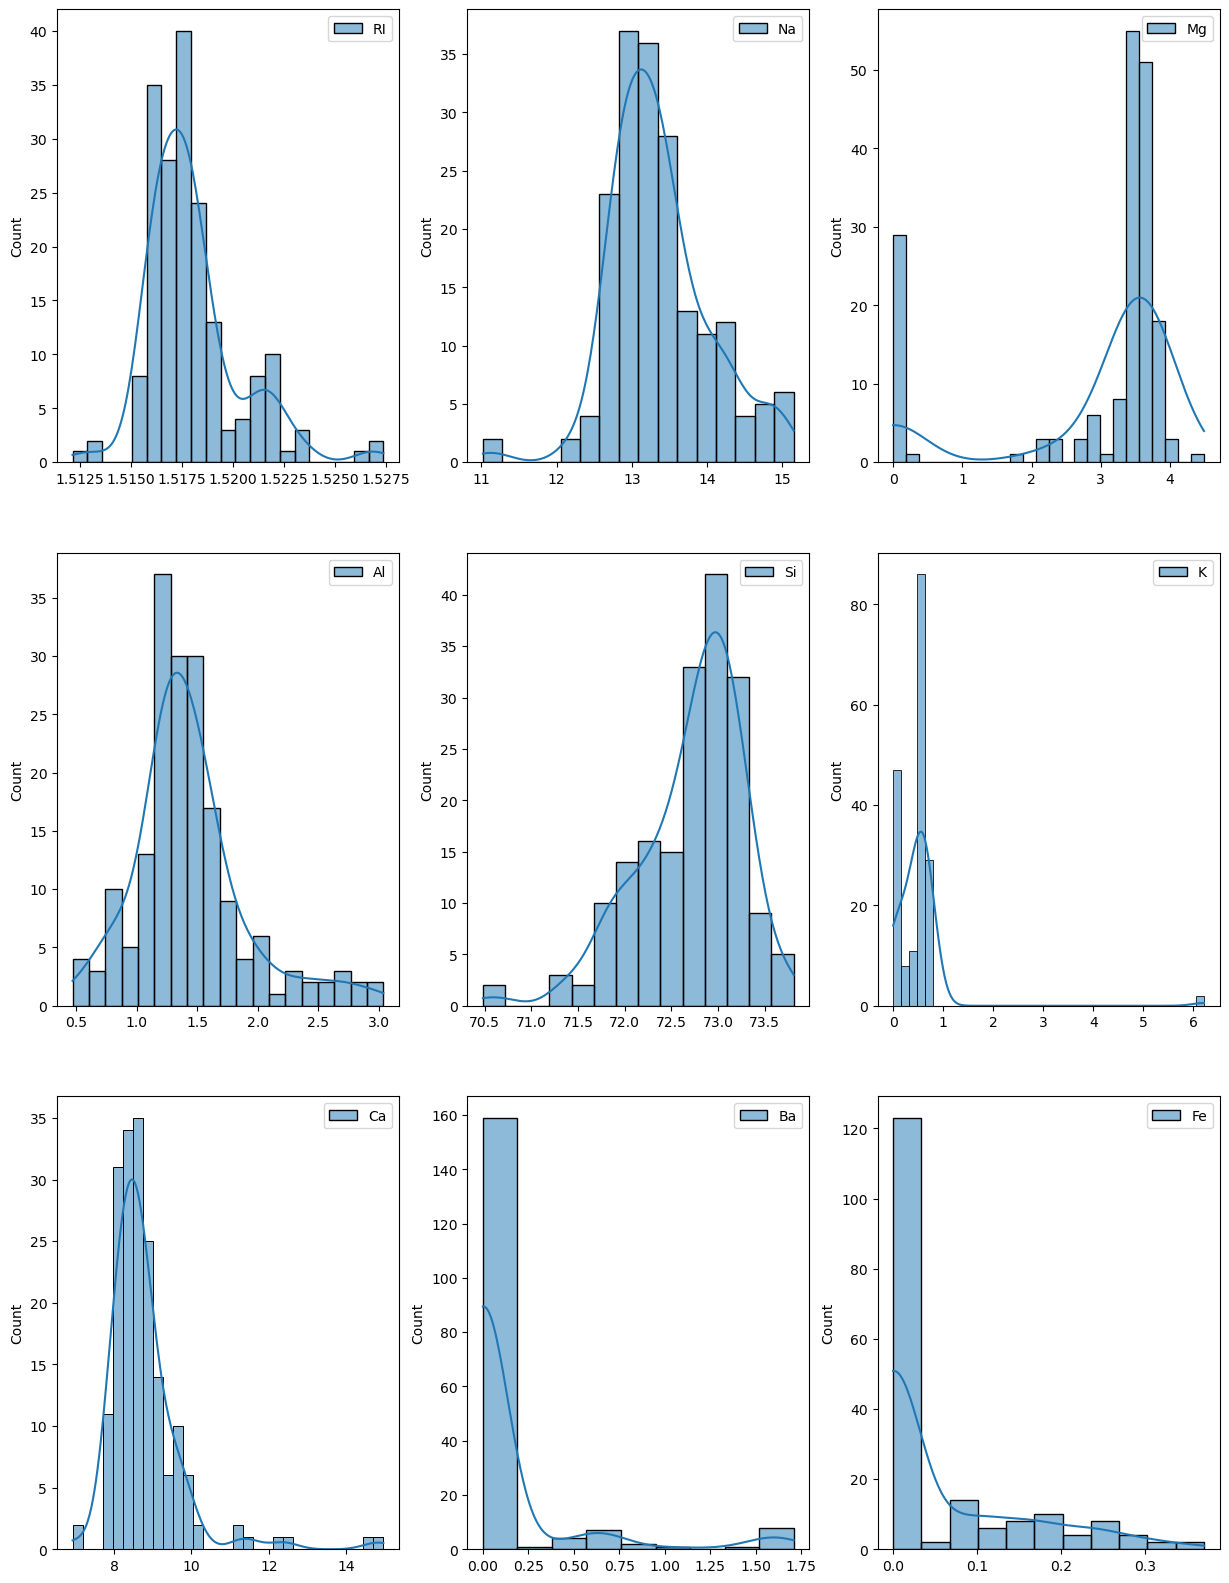

In [238]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))

for r in range(3):
    for c in range(3):
        sns.histplot(X.iloc[:, [3*r + c]], kde=True, ax=axes[r, c])
        
# смотрим распределение 

После удаления выбросов как с помощью "Изолирующего Леса" так и с помощью DBSCAN точность модели повысилась